In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:
def load_data(x_res_path='X_res.csv', y_res_path='y_res.csv'):
    """
    Load resampled data from CSV files.

    Parameters:
        x_res_path (str): Path to the CSV file containing feature data.
        y_res_path (str): Path to the CSV file containing target data.

    Returns:
        pd.DataFrame: Feature and target data.
    """
    X_res = pd.read_csv(x_res_path)
    y_res = pd.read_csv(y_res_path)
    return X_res, y_res

def train_model(X_train, y_train):
    """
    Train a Logistic Regression model.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.DataFrame): Training target data.

    Returns:
        LogisticRegression: Trained Logistic Regression model.
    """
    model = LogisticRegression()
    model.fit(X_train, y_train.values.ravel())
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model accuracy and display feature importances.

    Parameters:
        model (LogisticRegression): Trained Logistic Regression model.
        X_test (pd.DataFrame): Testing feature data.
        y_test (pd.DataFrame): Testing target data.
    """
    y_pred = model.predict(X_test)
    base_accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", base_accuracy)
    
    result = permutation_importance(model, X_test, y_test.values.ravel(), n_repeats=50, random_state=0)

    feature_importance = pd.DataFrame({'Feature': X_test.columns,
                                       'Importance': result.importances_mean})
    feature_importance['Importance'] = feature_importance['Importance'] * 100
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    feature_importance['Importance'] = feature_importance['Importance'].apply(lambda x: '{:.6f}%'.format(x))
    print(feature_importance)
    
    plot_feature_importance(result.importances_mean, X_test.columns)

def plot_feature_importance(importances, feature_names):
    """
    Plot feature importances.

    Parameters:
        importances (np.array): Array of feature importances.
        feature_names (list): List of feature names.
    """
    imp = pd.Series(importances*100, index=feature_names).sort_values(ascending=True)
    ax = imp.plot.barh()
    ax.set_title(f"LR permutation_importance")
    ax.figure.tight_layout()
    plt.xlabel('Importance (%)')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.ylabel('Feature')
    plt.title('Logistic Regression Permutation Feature Importance')
    for i, v in enumerate(imp):
        ax.text(v, i, str(round(v,1)), color='blue', fontweight='bold', fontsize=8)
    plt.show()


/home/dipak/anaconda3/envs/bayesian/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.92803597387663
     Feature  Importance
1     Mag_AS  35.580138%
4      DRC45  10.715426%
19   EM_Inph  10.640861%
3     DRC180   8.077947%
17  EM_Ap_rs   3.590553%
8   Mag_Xdrv   2.568186%
10  Mag_Zdrv   1.804696%
18     Em_Qd   1.705564%
9   mag_Ydrv   1.231072%
5      DRC90   0.658129%
0    Mag_TMI   0.440647%
12      Rd_U   0.172251%
15      Rd_K   0.125618%
2     DRC135   0.125163%
6     Mag_TD   0.034602%
11  Pseu_Grv   0.002194%
7      HDTDR   0.000000%
14     Rd_Th  -0.023804%
16  EM_ratio  -0.080453%
13     Rd_TC  -0.223372%


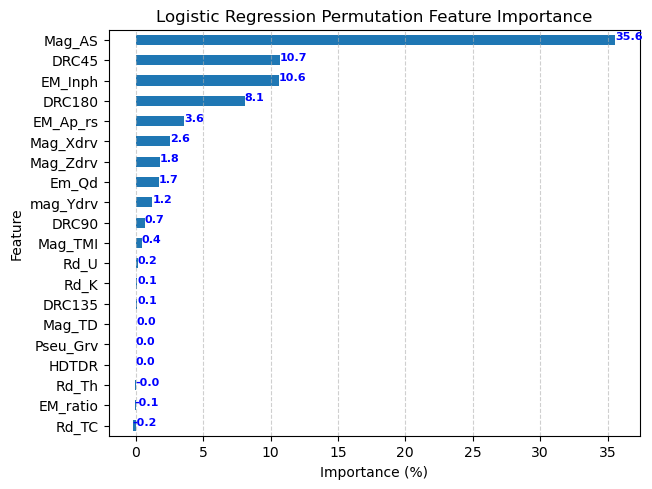

In [3]:
# Example usage:
X_res, y_res = load_data('/home/dipak/Desktop/codes/SMOTE/X_res.csv', '/home/dipak/Desktop/codes/SMOTE/y_res.csv')
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

model = train_model(X_train, y_train)
evaluate_model(model, X_test, y_test)